In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties import unumpy
from lmfit.models import GaussianModel,LinearModel

Espectros

In [29]:
fondo=pd.read_csv("./data/2021-12-15_fon_24h.csv")
calibracion=pd.read_csv("./data/2021-11-15_cal_133Ba22Na137Cs60Co_600s_1.csv")
canales=fondo.canal
suelo=pd.read_csv("./data/2021-12-04_mue_DG-EG-014_24h.csv")
th=pd.read_csv("./data/2021-11-15_mue_IAEA-RGTh-1_24h.csv")
u=pd.read_csv("./data/2021-11-16_mue_IAEA-RGU-1_24h.csv")
k=pd.read_csv("./data/2021-11-17_mue_IAEA-RGK-1_24h.csv")


suelo_I=suelo.I_gamma-fondo.I_gamma
th_I=th.I_gamma-fondo.I_gamma
u_I=u.I_gamma-fondo.I_gamma
k_I=k.I_gamma-fondo.I_gamma
calibracion_I=calibracion.I_gamma-fondo.I_gamma





In [30]:
def ajuste(data,x1,x2):
    gaussiana=GaussianModel()
    fondo=LinearModel()
    ajuste=gaussiana+fondo
    x=data.canal[x1:x2].values
    y=data.I_gamma[x1:x2].values
    parametros=gaussiana.guess(data=y,x=x)
    parametros+=fondo.guess(data=y,x=x)
    fit=ajuste.fit(y,parametros,x=x)
    return fit

# Ajuste energía

In [31]:
limites=[[2400,2480],[2635,2670],[2750,2800],[1350,1415],[720,770],[610,650]]
Energias_calibracion=[1173.22,1274.53,1332.49,661.65,356.013,302.851]
mu=[]
for x1,x2 in limites:
    fit=ajuste(calibracion,x1,x2)
    params=fit.params
    mu.append(params["center"].value)  
Tabla_calibracion=pd.DataFrame()
Tabla_calibracion["E"]=Energias_calibracion
Tabla_calibracion["mu"]=mu



In [32]:
y=Tabla_calibracion.E
x=Tabla_calibracion.mu
recta=LinearModel()
params=recta.guess(y,x=x)
recta=recta.fit(y,params,x=x)
E=recta.eval(x=canales)
print(recta.uvars)

def canal(E):
    return(E-recta.params["intercept"].value)/recta.params["slope"].value





{'slope': 0.4809916259041778+/-4.5505519070550416e-05, 'intercept': -1.1230228733145635+/-0.09011859015040846}


In [33]:
def I(sigma,M):
    return np.sqrt(2*np.pi)*sigma*M



def ajusteE(data,x1,x2):
    gaussiana=GaussianModel()
    fondo=LinearModel()
    ajuste=gaussiana+fondo
    x1=round(canal(x1))
    x2=round(canal(x2))
    y=data[x1:x2].values
    x=E[x1:x2]    
    parametros=gaussiana.guess(data=y,x=x)
    parametros+=fondo.guess(data=y,x=x)
    fit=ajuste.fit(y,parametros,x=x)
    return fit




# ajuste K

referencia

I=2.82(2)e+05
1.423+/-0.012


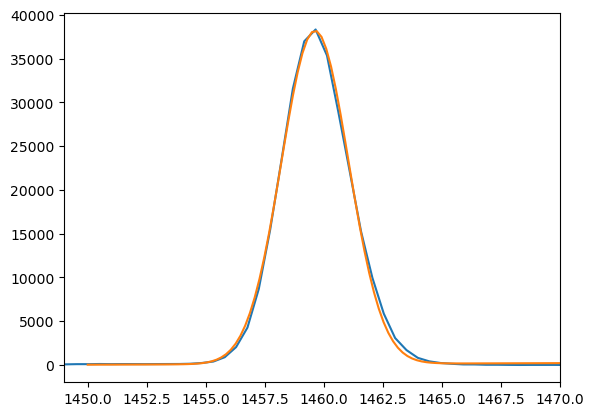

In [34]:
plt.plot(E,k_I)
fit=ajusteE(k_I,1450,1470)
fit.params
plt.plot(np.linspace(1450,1470,100),fit.eval(x=np.linspace(1450,1470,100)))
plt.xlim(1449,1470)

print(f"I={I(fit.uvars['sigma']/recta.params['slope'],fit.uvars['height']):.1uS}")
fit.params
print(fit.uvars["sigma"])

muestra

I=4.9(7)e+02


name,value,standard error,relative error,initial value,min,max,vary,expression
amplitude,236.449276,32.2620367,(13.64%),395.3751164932137,-inf,inf,True,
center,1459.95093,0.15631310,(0.01%),1459.7687929041497,-inf,inf,True,
sigma,1.42290000,0.16626965,(11.69%),1.4229,0.00000000,inf,True,
fwhm,3.35067338,0.39153511,(11.69%),2.265297401023235,-inf,inf,False,2.3548200*sigma
height,66.2939195,9.22532081,(13.92%),163.9652853,-inf,inf,False,"0.3989423*amplitude/max(1e-15, sigma)"
slope,0.84982427,0.41018642,(48.27%),0.8711374214225276,-inf,inf,True,
intercept,-1121.71074,598.821950,(53.38%),-1141.1211174319185,-inf,inf,True,


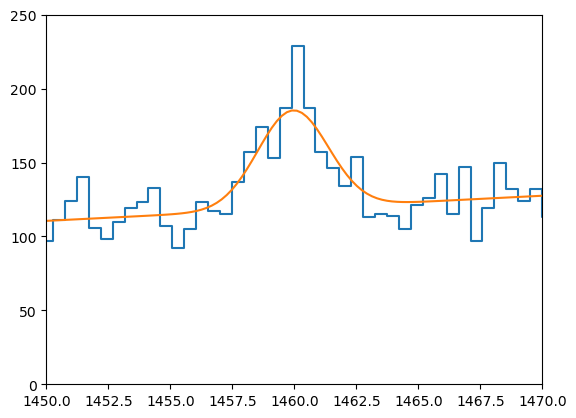

In [35]:
plt.plot(E,suelo_I,ds="steps-mid")
fit=ajusteE(suelo_I,1450,1470)
fit.params['sigma'].set(value=1.4229)
plt.plot(np.linspace(1450,1470,100),fit.eval(x=np.linspace(1450,1470,100)))
plt.xlim(1450,1470)
plt.ylim(0,250)
print(f"I={I(fit.uvars['sigma']/recta.params['slope'],fit.uvars['height']):.1uS}")
fit.params

# Ajuste U

referencia

I=8.6(1)e+05


name,value,standard error,relative error,initial value,min,max,vary,expression
amplitude,411305.178,6392.93006,(1.55%),523742.161614545,-inf,inf,True,
center,351.864002,0.02642468,(0.01%),351.92483054035193,-inf,inf,True,
sigma,1.86165519,0.02865840,(1.54%),1.9239665036167253,0.00000000,inf,True,
fwhm,4.38386288,0.06748537,(1.54%),4.530594802046737,-inf,inf,False,2.3548200*sigma
height,88140.4002,1102.42325,(1.25%),108600.07290600002,-inf,inf,False,"0.3989423*amplitude/max(1e-15, sigma)"
slope,-26.8331573,44.5361782,(165.97%),-121.91954007668916,-inf,inf,True,
intercept,15172.2613,15698.1403,(103.47%),65102.98846610582,-inf,inf,True,


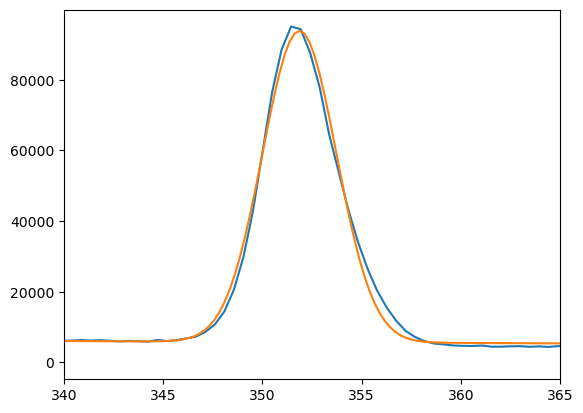

In [36]:
plt.plot(E,u_I)
fit=ajusteE(u_I,340,365)
fit.params
plt.plot(np.linspace(340,365,100),fit.eval(x=np.linspace(340,365,100)))
plt.xlim(340,365)

print(f"I={I(fit.uvars['sigma']/recta.params['slope'],fit.uvars['height']):.1uS}")
fit.params

muestra

I=1.57(2)e+05


name,value,standard error,relative error,initial value,min,max,vary,expression
amplitude,75655.9280,765.392039,(1.01%),81409.7566507839,-inf,inf,True,
center,351.390647,0.01093918,(0.00%),351.44383891444784,-inf,inf,True,
sigma,1.06264918,0.01142915,(1.08%),0.9619832518083342,0.00000000,inf,True,
fwhm,2.50234755,0.02691360,(1.08%),2.2652974010233016,-inf,inf,False,2.3548200*sigma
height,28402.9296,256.503899,(0.90%),33761.290022099995,-inf,inf,False,"0.3989423*amplitude/max(1e-15, sigma)"
slope,-15.1391890,7.87252610,(52.00%),-60.10520419075045,-inf,inf,True,
intercept,6389.35184,2774.95510,(43.43%),25249.661157059913,-inf,inf,True,


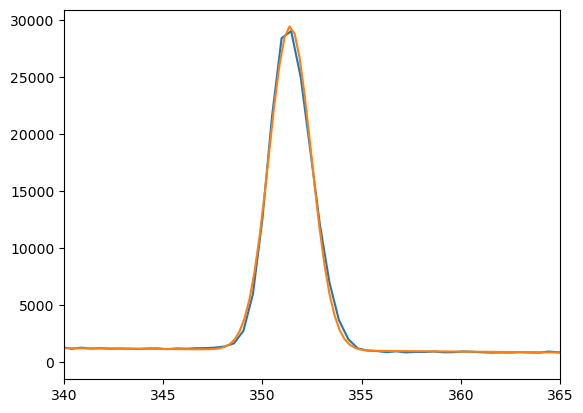

In [37]:
plt.plot(E,suelo_I)
fi2t=ajusteE(suelo_I,340,365)
fi2t.params
plt.plot(np.linspace(340,365,100),fi2t.eval(x=np.linspace(340,365,100)))
plt.xlim(340,365)

print(f"I={I(fi2t.uvars['sigma']/recta.params['slope'],fi2t.uvars['height']):.1uS}")
fi2t.params

# Ajuste th

referencia

I=1.23(1)e+05


name,value,standard error,relative error,initial value,min,max,vary,expression
amplitude,59263.4485,476.280302,(0.80%),69693.52213120251,-inf,inf,True,
center,2611.41538,0.01737893,(0.00%),2611.3829932252274,-inf,inf,True,
sigma,2.22673614,0.01845696,(0.83%),2.1644623165689154,0.00000000,inf,True,
fwhm,5.24356279,0.04346281,(0.83%),5.096919152302814,-inf,inf,False,2.3548200*sigma
height,10617.6462,72.9319570,(0.69%),12845.543117700001,-inf,inf,False,"0.3989423*amplitude/max(1e-15, sigma)"
slope,1.00921037,1.60625530,(159.16%),20.18991327211832,-inf,inf,True,
intercept,-2581.78374,4190.73835,(162.32%),-51153.185339514406,-inf,inf,True,


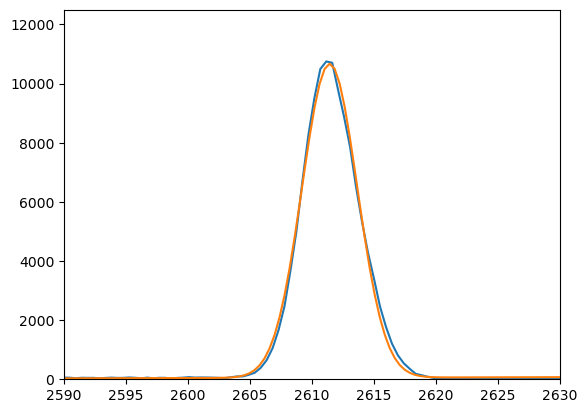

In [38]:
plt.plot(E,th_I)
fit=ajusteE(th_I,2590,2630)
fit.params
plt.plot(np.linspace(2590,2630,100),fit.eval(x=np.linspace(2590,2630,100)))
plt.xlim(2590,2630)
plt.ylim(0,12500)

print(f"I={I(fit.uvars['sigma']/recta.params['slope'],fit.uvars['height']):.1uS}")
fit.params

muestra

I=1.51(3)e+03


name,value,standard error,relative error,initial value,min,max,vary,expression
amplitude,724.348223,12.6126489,(1.74%),909.074172958849,-inf,inf,True,
center,2611.38328,0.02149788,(0.00%),2611.382993225227,-inf,inf,True,
sigma,1.16410578,0.02213675,(1.90%),1.2024790647603822,0.00000000,inf,True,
fwhm,2.74125957,0.05212805,(1.90%),2.8316217512790436,-inf,inf,False,2.3548200*sigma
height,248.236158,4.00700741,(1.61%),301.6003788,-inf,inf,False,"0.3989423*amplitude/max(1e-15, sigma)"
slope,0.05521544,0.06406669,(116.03%),0.2852666386976225,-inf,inf,True,
intercept,-142.540861,167.176941,(117.28%),-724.7614156235019,-inf,inf,True,


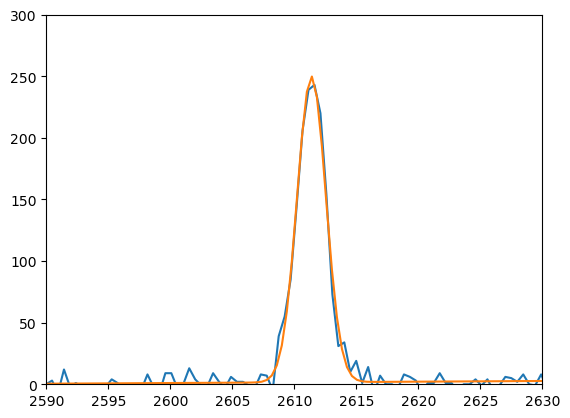

In [39]:
plt.plot(E,suelo_I)
fit=ajusteE(suelo_I,2590,2630)
fit.params
plt.plot(np.linspace(2590,2630,100),fit.eval(x=np.linspace(2590,2630,100)))
plt.xlim(2590,2630)
plt.ylim(0,300)

print(f"I={I(fit.uvars['sigma']/recta.params['slope'],fit.uvars['height']):.1uS}")
fit.params

Text(0.5, 0, 'E (keV)')

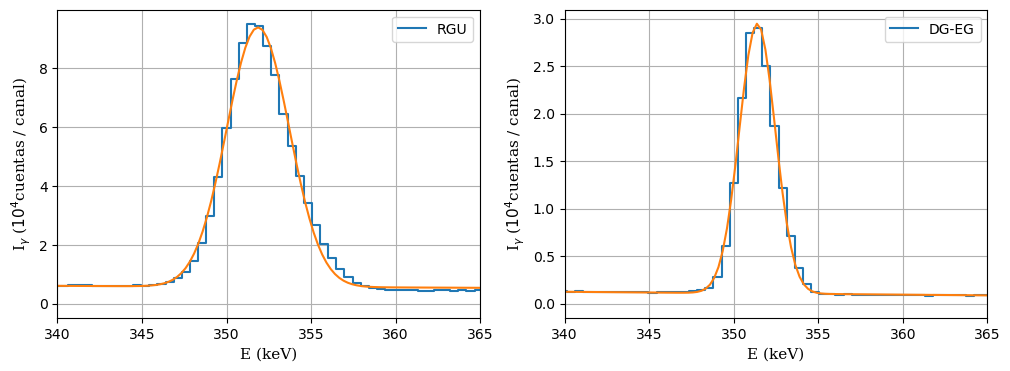

In [40]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
fit=ajusteE(u_I,340,365)


ax[0].plot(E,1e-4*u_I,ds="steps-mid",label="RGU")
ax[0].plot(np.linspace(340,365,100),1e-4*fit.eval(x=np.linspace(340,365,100)))
ax[0].set_xlim(340,365)
ax[0].grid()
ax[0].set_ylabel("I$_\gamma$ ($10^4$cuentas / canal)", fontsize=11,family="serif")
ax[0].legend()
ax[0].set_xlabel("E (keV)", fontsize=11,family="serif")

fi2t=ajusteE(suelo_I,340,365)
ax[1].plot(E,1e-4*suelo_I,ds="steps-mid",label="DG-EG")
ax[1].plot(np.linspace(340,365,100),1e-4*fi2t.eval(x=np.linspace(340,365,100)))
ax[1].set_xlim(340,365)
ax[1].grid()
ax[1].set_ylabel("I$_\gamma$ ($10^4$cuentas / canal)", fontsize=11,family="serif")
ax[1].legend()
ax[1].set_xlabel("E (keV)", fontsize=11,family="serif")


(0.0, 3.0)

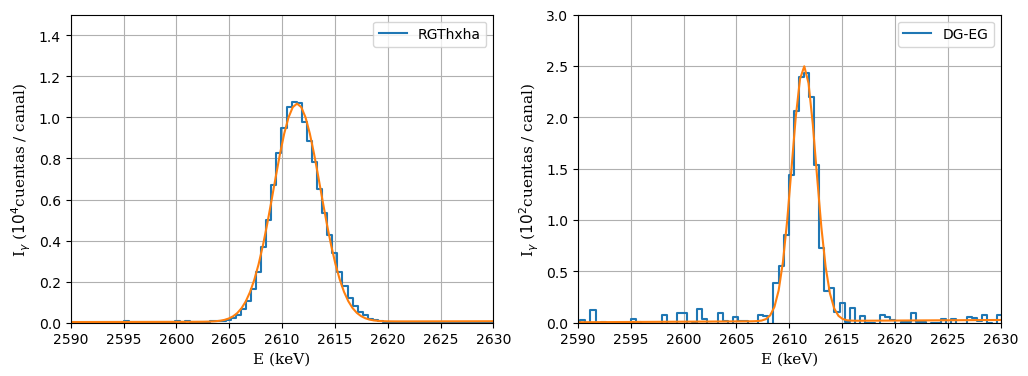

In [41]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
fit=ajusteE(th_I,2590,2630)


ax[0].plot(E,1e-4*th_I,ds="steps-mid",label="RGThxha")
ax[0].plot(np.linspace(2590,2630,100),1e-4*fit.eval(x=np.linspace(2590,2630,100)))
ax[0].set_xlim(2590,2630)
ax[0].grid()
ax[0].set_ylabel("I$_\gamma$ ($10^4$cuentas / canal)", fontsize=11,family="serif")
ax[0].legend()
ax[0].set_xlabel("E (keV)", fontsize=11,family="serif")
ax[0].set_ylim(0,1.5)

fi2t=ajusteE(suelo_I,2590,2630)
ax[1].plot(E,1e-2*suelo_I,ds="steps-mid",label="DG-EG")
ax[1].plot(np.linspace(2590,2630,100),1e-2*fi2t.eval(x=np.linspace(2590,2630,100)))
ax[1].set_xlim(2590,2630)
ax[1].grid()
ax[1].set_ylabel("I$_\gamma$ ($10^2$cuentas / canal)", fontsize=11,family="serif")
ax[1].legend()
ax[1].set_xlabel("E (keV)", fontsize=11,family="serif")
ax[1].set_ylim(0,3)


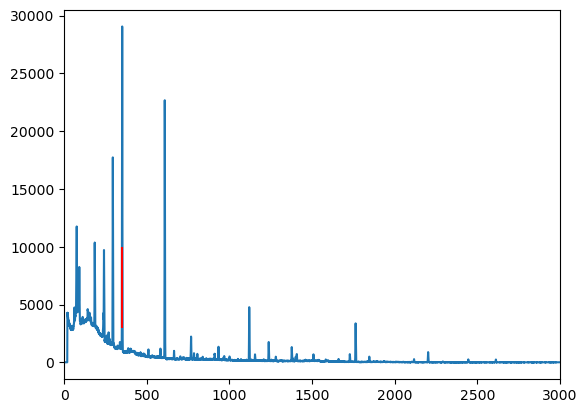

In [42]:
plt.plot(E,suelo_I)
plt.xlim(0,3000)
plt.vlines(352,10000,3000,color="r")

(0.0, 3000.0)

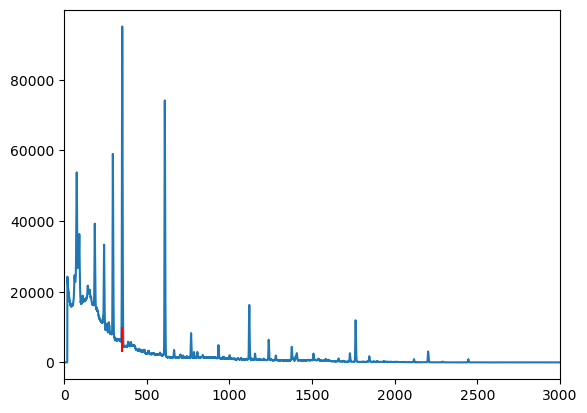

In [43]:
plt.plot(E,u_I)
plt.vlines(352,10000,3000,color="r")
plt.xlim(0,3000)

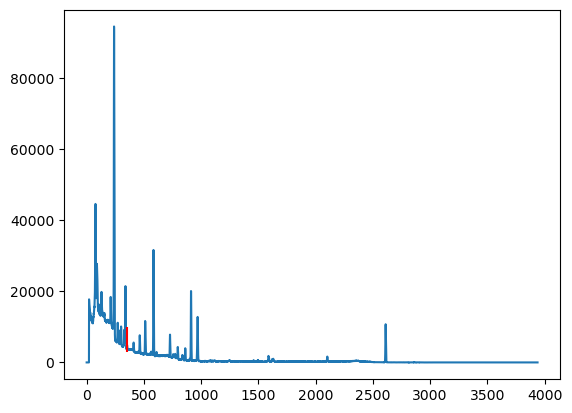

In [45]:
plt.plot(E,th_I)
plt.vlines(352,10000,3000,color="r")